# Description
Addressing comment XX on complexity metrics

### Load packages

In [2]:
import networkExpansionPy.lib as ne
import numpy as np
import pandas as pd
import pickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr,pearsonr,mannwhitneyu
from statsmodels.stats.multitest import multipletests
plt.rcParams['font.family'] = 'Arial'
import pingouin as pg


def load_data(network_name):
    with open(ne.asset_path  + "/metabolic_networks/" + network_name,"rb") as filehandler:
        metabolism = pickle.load(filehandler)
    return metabolism

# load the metabolism object from the repo
model_id = "metabolism.v8.01May2023.pkl"
metabolism = pd.read_pickle('/Users/joshuagoldford/Documents/github/network-expansion-assets/models/' + model_id)
cids = metabolism.coenzymes

In [3]:
import warnings
from scipy.sparse import (spdiags, SparseEfficiencyWarning, csc_matrix,
    csr_matrix, isspmatrix, dok_matrix, lil_matrix, bsr_matrix)
warnings.simplefilter('ignore',SparseEfficiencyWarning)

### Run network expansion

In [4]:
seed_set = pd.read_csv('../assets/seed_set.csv')['ID'].tolist()

print('There were {N} compounds in this seed set...'.format(N=len(seed_set)))

ne_cpds,ne_rxns = metabolism.expand(seed_set,algorithm='trace')
print('There were {N} compounds produced in this expansion!'.format(N=len(ne_cpds)))

# parse data into dataframes
rn_df = pd.DataFrame(pd.Series(ne_rxns),columns = ['iteration'])
rn_df.reset_index(inplace=True)
rn_df.columns = ['rn','direction','iteration']
rn_df['rn_kegg']= rn_df['rn'].apply(lambda x: x.split('_')[0])

There were 70 compounds in this seed set...
There were 4315 compounds produced in this expansion!


### Plot average molecular complexity vs. expansion iteration

Text(0.1, 0.75, '$r=0.72$ \n$P<10^{-16}$')

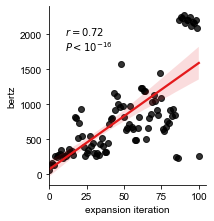

In [5]:
skws={"color": "black"}
cmap = sns.color_palette("Set1")

lkws={'color': cmap[0]}
#complexity = pd.read_csv('../assets/kegg_cpds.iterationComplexity.csv',index_col=0)
complexity_metrics = "../assets/kegg_compound_complexity_metrics.csv"
complexity = pd.read_csv(complexity_metrics,index_col=0).set_index("cid")
feature_type = "bertz"
complexity = complexity[[feature_type]].join(pd.DataFrame(pd.Series(ne_cpds),columns=['iteration']))
sns.lmplot(x='iteration',y=feature_type,data=complexity.groupby('iteration').mean().reset_index(),height=3, aspect=1,line_kws=lkws,scatter_kws=skws)
plt.xlim([0,105])
plt.ylabel(feature_type)
plt.xlabel('expansion iteration')
c = complexity.groupby('iteration').mean().reset_index()


r,pval = pearsonr(c['iteration'].values,c[feature_type].values)
d = int(np.ceil(np.log10(pval)))
label = '$r={R}$ \n'.format(R=round(r,2)) + '$P<10^{' + str(d) + '}$'
plt.annotate(label, xy=(0.1, 0.75), xycoords='axes fraction')

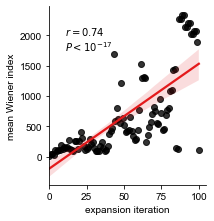

In [11]:
skws={"color": "black"}
cmap = sns.color_palette("Set1")

lkws={'color': cmap[0]}
#complexity = pd.read_csv('../assets/kegg_cpds.iterationComplexity.csv',index_col=0)
complexity_metrics = "../assets/kegg_compound_complexity_metrics.csv"
complexity = pd.read_csv(complexity_metrics,index_col=0).set_index("cid")
feature_type = "weiner"
complexity = complexity[[feature_type]].join(pd.DataFrame(pd.Series(ne_cpds),columns=['iteration']))
sns.lmplot(x='iteration',y=feature_type,data=complexity.groupby('iteration').mean().reset_index(),height=3, aspect=1,line_kws=lkws,scatter_kws=skws)
plt.xlim([0,105])
#plt.ylabel(feature_type)
plt.ylabel("mean Wiener index")

plt.xlabel('expansion iteration')
c = complexity.groupby('iteration').mean().reset_index()


r,pval = pearsonr(c['iteration'].values,c[feature_type].values)
d = int(np.ceil(np.log10(pval)))
label = '$r={R}$ \n'.format(R=round(r,2)) + '$P<10^{' + str(d) + '}$'
plt.annotate(label, xy=(0.1, 0.75), xycoords='axes fraction')
plt.savefig("figs/FigSX_WeinerComplexity.svg")

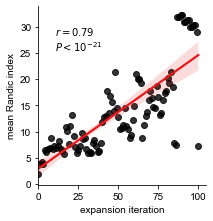

In [10]:
skws={"color": "black"}
cmap = sns.color_palette("Set1")

lkws={'color': cmap[0]}
#complexity = pd.read_csv('../assets/kegg_cpds.iterationComplexity.csv',index_col=0)
complexity_metrics = "../assets/kegg_compound_complexity_metrics.csv"
complexity = pd.read_csv(complexity_metrics,index_col=0).set_index("cid")
feature_type = "randic"
complexity = complexity[[feature_type]].join(pd.DataFrame(pd.Series(ne_cpds),columns=['iteration']))
sns.lmplot(x='iteration',y=feature_type,data=complexity.groupby('iteration').mean().reset_index(),height=3, aspect=1,line_kws=lkws,scatter_kws=skws)
plt.xlim([0,105])
plt.ylabel("mean Randic index")

plt.xlabel('expansion iteration')
c = complexity.groupby('iteration').mean().reset_index()


r,pval = pearsonr(c['iteration'].values,c[feature_type].values)
d = int(np.ceil(np.log10(pval)))
label = '$r={R}$ \n'.format(R=round(r,2)) + '$P<10^{' + str(d) + '}$'
plt.annotate(label, xy=(0.1, 0.75), xycoords='axes fraction')
plt.savefig("figs/FigSX_RandicComplexity.svg")

In [39]:
complexity = pd.read_csv(complexity_metrics,index_col=0).set_index("cid")


In [42]:
c = complexity["bertz"] / complexity["mol_weight"]

In [45]:
c.sort_values().dropna()

cid
C00001    0.000000
C14818    0.000000
C01529    0.000000
C01528    0.000000
C16455    0.000000
            ...   
C19174    4.572649
C19393    4.592492
C06020    4.655914
C06021    4.807640
C10392    4.865200
Length: 16673, dtype: float64